In [25]:
import pandas as pd
import numpy as np
import sklearn
from keras.models import Sequential
from keras.layers import Dense, Dropout, Masking, Embedding
from matplotlib import pyplot as plt
from ipywidgets import interact
import pickle
import math
from IPython.display import clear_output
plt.rcParams['figure.dpi'] = 200

In [26]:
all_df_norm = pd.read_csv("data/all_df_basic_norm.csv")
norm_bounds = pd.read_csv("data/norm_bounds_basic.csv")
all_df = pd.read_csv("data/all_df_basic.csv")

In [27]:
all_df_shuffled, all_df_norm_shuffled = sklearn.utils.shuffle(all_df, all_df_norm)

In [28]:
# x_labels = ["M1-PL", "M1-PR", "M2-PL", "M2-PR",
#             "M1-AL-IN-ACT", "M1-AR-IN-ACT", "M2-AL-IN-ACT", "M2-AR-IN-ACT",
#             "M1-AL-OUT", "M1-AR-OUT", "M2-AL-OUT", "M2-AR-OUT"]
# lookback = 3
# new_x_labels = []
# for i in range(lookback):
#     for l in x_labels:
#         new_x_labels.append(l + str(i))
# x_labels += new_x_labels

# y_labels = ["M1X", "M1Y", "M2X", "M2Y", "M3X", "M3Y",
#             "M4X", "M4Y", "M5X", "M5Y", "M6X", "M6Y",
#             "M7X", "M7Y", "M8X", "M8Y", "M9X", "M9Y",
#             "M10X", "M10Y"]
# #p_labels = ["5a0", "5a1", "5a2", "5a3", "5a4", "5a5", "d"]
# p_labels = ["4a0", "4a1", "4a2", "4a3", "4a4", "d"]

#bmodel
# x_labels = ["M1X", "M1Y", "M2X", "M2Y", "M3X", "M3Y",
#             "M4X", "M4Y", "M5X", "M5Y", "M6X", "M6Y",
#             "M7X", "M7Y", "M8X", "M8Y", "M9X", "M9Y",
#             "M10X", "M10Y"]
x_labels = ["M10X", "M10Y"]
y_labels = ["M1-PL", "M1-PR", "M2-PL", "M2-PR"]

In [29]:
x_data = all_df_norm_shuffled[x_labels]
y_data = all_df_norm_shuffled[y_labels]
#p_data = all_df_norm_shuffled[p_labels]

x_dim = len(x_labels)
y_dim = len(y_labels)
#p_dim = len(p_labels)

split = int(0.8 * len(x_data))

x_train = x_data[:split]
y_train = y_data[:split]
#p_train = p_data[:split]

x_test = x_data[split:]
y_test = y_data[split:]
#p_test = p_data[split:]

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
# print(p_train.shape)
# print(p_test.shape)

(2699, 2)
(675, 2)
(2699, 4)
(675, 4)


In [217]:
fmodel = Sequential()
fmodel.add(Dense(128, input_dim=x_dim, activation='relu'))
fmodel.add(Dropout(0.2))
fmodel.add(Dense(64, activation='relu'))
fmodel.add(Dropout(0.2))
fmodel.add(Dense(32, activation='relu'))
fmodel.add(Dropout(0.2))
fmodel.add(Dense(16, activation='relu'))
fmodel.add(Dropout(0.2))
fmodel.add(Dense(y_dim, activation='relu'))

fmodel.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
fmodel.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             (None, 128)               6272      
_________________________________________________________________
dropout_28 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_30 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_38 (Dense)             (None, 16)               

In [218]:
historyf = fmodel.fit(x_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
589/589 [==============================] - 1s 464us/step - loss: 0.0753 - accuracy: 0.2316
Epoch 2/100
589/589 [==============================] - 0s 460us/step - loss: 0.0068 - accuracy: 0.6470
Epoch 3/100
589/589 [==============================] - 0s 460us/step - loss: 0.0041 - accuracy: 0.8051
Epoch 4/100
589/589 [==============================] - 0s 473us/step - loss: 0.0029 - accuracy: 0.8331
Epoch 5/100
589/589 [==============================] - 0s 473us/step - loss: 0.0024 - accuracy: 0.8763
Epoch 6/100
589/589 [==============================] - 0s 466us/step - loss: 0.0021 - accuracy: 0.8768
Epoch 7/100
589/589 [==============================] - 0s 460us/step - loss: 0.0019 - accuracy: 0.8902
Epoch 8/100
589/589 [==============================] - 0s 460us/step - loss: 0.0018 - accuracy: 0.8938
Epoch 9/100
589/589 [==============================] - 0s 468us/step - loss: 0.0017 - accuracy: 0.9041
Epoch 10/100
589/589 [==============================] - 0s 460us/step - l

In [235]:
loss, accuracy = fmodel.evaluate(x_test, y_test)
print('Loss: %.8f, Accuracy: %.2f' % (loss, (accuracy*100)))

37/37 [==============================] - 0s 376us/step - loss: 3.1475e-04 - accuracy: 0.9457
Loss: 0.00031475, Accuracy: 94.57


In [49]:
pmodel = Sequential()
pmodel.add(Dense(128, input_dim=x_dim, activation='relu'))
pmodel.add(Dropout(0.2))
pmodel.add(Dense(64, activation='relu'))
pmodel.add(Dropout(0.2))
pmodel.add(Dense(32, activation='relu'))
pmodel.add(Dropout(0.2))
pmodel.add(Dense(16, activation='relu'))
pmodel.add(Dropout(0.2))
pmodel.add(Dense(p_dim, activation='relu'))

pmodel.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
pmodel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               6272      
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_17 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_18 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 16)               

In [50]:
history = pmodel.fit(x_train, p_train, epochs=100, batch_size=8)

Epoch 1/100
589/589 [==============================] - 1s 509us/step - loss: 0.0673 - accuracy: 0.3029
Epoch 2/100
589/589 [==============================] - 0s 527us/step - loss: 0.0149 - accuracy: 0.4435
Epoch 3/100
589/589 [==============================] - 0s 580us/step - loss: 0.0110 - accuracy: 0.5200
Epoch 4/100
589/589 [==============================] - 0s 546us/step - loss: 0.0090 - accuracy: 0.5234
Epoch 5/100
589/589 [==============================] - 0s 550us/step - loss: 0.0074 - accuracy: 0.5731
Epoch 6/100
589/589 [==============================] - 0s 562us/step - loss: 0.0066 - accuracy: 0.5773
Epoch 7/100
589/589 [==============================] - 0s 548us/step - loss: 0.0064 - accuracy: 0.5704
Epoch 8/100
589/589 [==============================] - 0s 566us/step - loss: 0.0061 - accuracy: 0.6067
Epoch 9/100
589/589 [==============================] - 0s 535us/step - loss: 0.0060 - accuracy: 0.6270
Epoch 10/100
589/589 [==============================] - 0s 474us/step - l

In [51]:
loss, accuracy = pmodel.evaluate(x_test, p_test)
print('Loss: %.8f, Accuracy: %.2f' % (loss, (accuracy*100)))

37/37 [==============================] - 0s 353us/step - loss: 0.0016 - accuracy: 0.7394
Loss: 0.00162089, Accuracy: 73.94


In [31]:
bmodel = Sequential()
bmodel.add(Dense(128, input_dim=x_dim, activation='relu'))
bmodel.add(Dropout(0.2))
bmodel.add(Dense(64, activation='relu'))
bmodel.add(Dropout(0.2))
bmodel.add(Dense(32, activation='relu'))
bmodel.add(Dropout(0.2))
bmodel.add(Dense(16, activation='relu'))
bmodel.add(Dropout(0.2))
bmodel.add(Dense(y_dim, activation='relu'))

bmodel.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
bmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               384       
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_13 (Dense)            (None, 16)               

In [32]:
historyb = bmodel.fit(x_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
338/338 [==============================] - 1s 1ms/step - loss: 0.0380 - accuracy: 0.3905
Epoch 2/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0284 - accuracy: 0.5254
Epoch 3/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0245 - accuracy: 0.5672
Epoch 4/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0217 - accuracy: 0.5702
Epoch 5/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0201 - accuracy: 0.5835
Epoch 6/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0183 - accuracy: 0.5987
Epoch 7/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0176 - accuracy: 0.5891
Epoch 8/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.6113
Epoch 9/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0158 - accuracy: 0.6099
Epoch 10/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0149 - accura

338/338 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 0.6614
Epoch 82/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0108 - accuracy: 0.6536
Epoch 83/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 0.6354
Epoch 84/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0102 - accuracy: 0.6428
Epoch 85/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0101 - accuracy: 0.6476
Epoch 86/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0106 - accuracy: 0.6573
Epoch 87/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0105 - accuracy: 0.6376
Epoch 88/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0114 - accuracy: 0.6632
Epoch 89/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0107 - accuracy: 0.6569
Epoch 90/100
338/338 [==============================] - 0s 1ms/step - loss: 0.0111 - accuracy: 

In [33]:
loss, accuracy = bmodel.evaluate(x_test, y_test)
print('Loss: %.8f, Accuracy: %.2f' % (loss, (accuracy*100)))

22/22 [==============================] - 0s 838us/step - loss: 0.0071 - accuracy: 0.6919
Loss: 0.00711590, Accuracy: 69.19


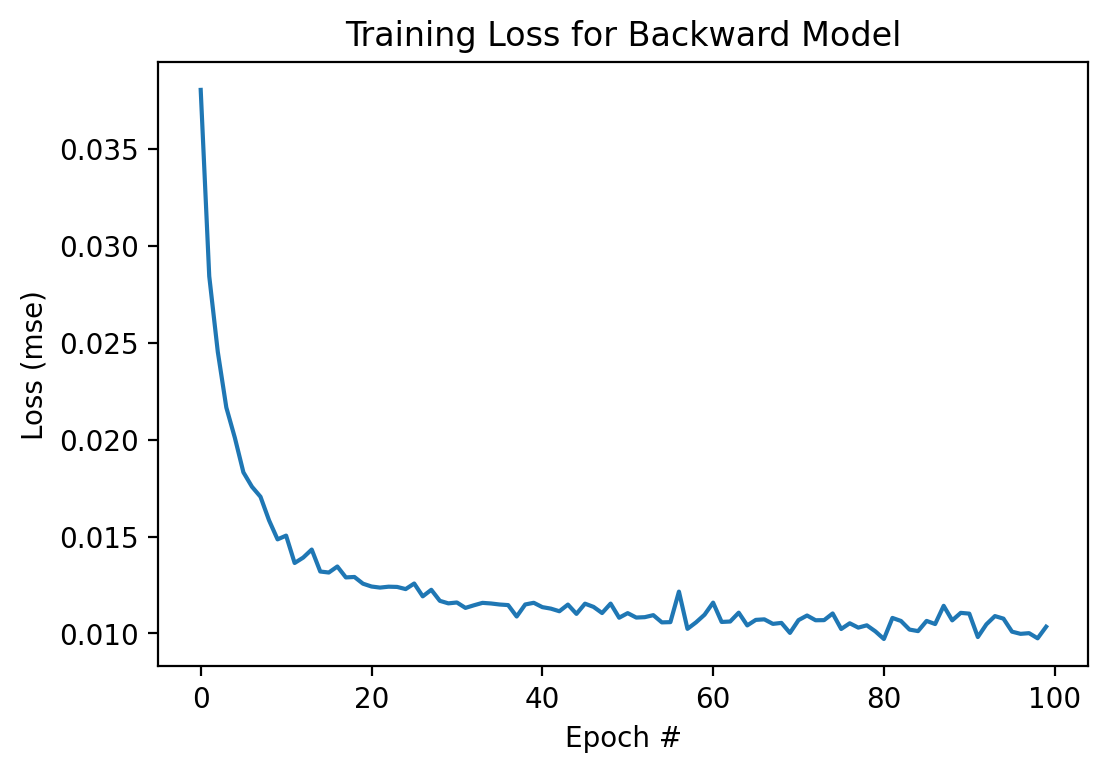

In [34]:
#plt.plot(historyf.history["loss"], label="Forward Model")
plt.plot(historyb.history["loss"], label="Backward Model")
#plt.legend()
plt.xlabel("Epoch #")
plt.ylabel("Loss (mse)")
plt.title("Training Loss for Backward Model")
plt.savefig("data/training_backward.png")

In [18]:
import pickle

In [36]:
pickle.dump( historyb, open( "/Volumes/Flash/basic_bmodel/training/basic_model_history.p", "wb" ) )

INFO:tensorflow:Assets written to: ram://b850d07e-bbf1-433b-8508-a11b584734f2/assets


In [40]:
pickle.dump( y_train, open( "/Volumes/Flash/basic_bmodel/data/y_train.p", "wb" ) )

In [14]:
def rescale(data, labels):
    ndata = []
    for idx, label in enumerate(labels):
        d = data[idx]
        min_val = norm_bounds.loc[0, label]
        max_val = norm_bounds.loc[1, label]
        rescaled_d = (d * (max_val - min_val)) + min_val
        ndata.append(rescaled_d)
    return np.array(ndata)

In [25]:
num_tests = len(x_test)
def evaluate_markers(idx=(0,num_tests-1,1)):
    index = x_test.index[idx]
    x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
    y_pred = fmodel.predict(x_select)
    cp = rescale(y_pred[0], y_labels)
    ct = all_df.loc[index, y_labels].to_numpy()
    
    xp = [0]
    xt = [0]
    yp = [0]
    yt = [0]
    
    for i in range(len(cp)):
        if i%2 == 0:
            xp.append(cp[i])
            xt.append(ct[i])
        else:
            yp.append(cp[i])
            yt.append(ct[i])
    
    plt.plot(xt, yt, "-o", label="actual")
    plt.plot(xp, yp, "-o", label="predicted")
    plt.xlim([-20,20])
    plt.ylim([-1,39])
    plt.xlabel("x (cm)")
    plt.ylabel("y (cm)")
    plt.legend()
    plt.title("Predicted Markers vs. Actual Markers")
    plt.show()
        
interact(evaluate_markers)

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.evaluate_markers(idx=(0, 1177, 1))>

In [41]:
bmodel.save("/Volumes/Flash/basic_bmodel/")

INFO:tensorflow:Assets written to: /Volumes/Flash/basic_bmodel/assets


In [42]:
num_tests = len(x_test)
def evaluate_markers(idx=(0,num_tests-1,1)):
    index = x_test.index[idx]
    x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
    print(x_select)
    print(x_select.shape)
    y_pred = bmodel.predict(x_select)
    pp = rescale(y_pred[0], y_labels)
    pt = all_df.loc[index, y_labels].to_numpy()
    print(pp)
    print(pt)
    plt.plot([1,2], pt[0:2], "-o", label="actual M1", color="C0")
    plt.plot([3,4], pt[2:4], "-x", label="actual M2", color="C0")
    plt.plot([1,2], pp[0:2], "-o", label="predicted M1", color="C1")
    plt.plot([3,4], pp[2:4], "-x", label="predicted M2", color="C1")
    plt.ylim([95,120])
    plt.xlim([0.5,4.5])
    plt.xticks([1,2,3,4], ["P_1,1", "P_1,2", "P_2,1", "P_2,2"])
    plt.legend()
    plt.xlabel("Pressure Sensor")
    plt.ylabel("Pressure Value (kPa)")
    plt.show()
        
interact(evaluate_markers)

interactive(children=(IntSlider(value=337, description='idx', max=674), Output()), _dom_classes=('widget-inter…

<function __main__.evaluate_markers(idx=(0, 674, 1))>

In [53]:
num_tests = len(x_test)
def evaluate_polynomial(idx=(0,num_tests-1,1)):
    index = x_test.index[idx]
    x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
    p_pred = pmodel.predict(x_select)
    pp = rescale(p_pred[0], p_labels)
    pt = all_df.loc[index, p_labels].to_numpy()
    
    ap = np.flip(pp[:-1])
    dp = pp[-1]
    at = np.flip(pt[:-1])
    dt = pt[-1]
    
    polyp = np.poly1d(ap)
    polyt = np.poly1d(at)
    
    yp = np.linspace(0, dp)
    xp = polyp(yp)
    
    yt = np.linspace(0, dt)
    xt = polyt(yt)
    
    
    plt.plot(xt, yt, label="actual")
    plt.plot(xp, yp, label="predicted")
    plt.xlim([-20,20])
    plt.ylim([-1,39])
    plt.xlabel("x (cm)")
    plt.ylabel("y (cm)")
    plt.legend()
    plt.title("Predicted Markers vs. Actual Markers")
    plt.show()
        
interact(evaluate_polynomial)

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.evaluate_polynomial(idx=(0, 1177, 1))>

In [239]:
errors = []
for idx in range(len(x_test)):
    index = x_test.index[idx]
    x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
    y_pred = bmodel.predict(x_select)
    y_pred = rescale(y_pred[0], y_labels)
    y_select = all_df.loc[index, y_labels].to_numpy()
    diff = (y_pred - y_select)
    mse = (diff * diff).sum() / len(y_labels)
    rmse = math.sqrt(mse)
    errors.append((rmse, index))

In [240]:
errors.sort()
print(errors)

[(0.17643722095964845, 4737), (0.2404698760713898, 1861), (0.2479439627935668, 2173), (0.2499304887335812, 1354), (0.2650153252643931, 1856), (0.2688337018332872, 1346), (0.2692322425323736, 4743), (0.2769129198152134, 4732), (0.28104447216944295, 1345), (0.28414439588116885, 1864), (0.28658783596682935, 357), (0.28707523466751317, 361), (0.29953379479733505, 527), (0.3024703001614707, 1855), (0.3068469189300886, 4928), (0.30744530055261793, 1865), (0.31283164069003516, 2175), (0.33019380312828084, 356), (0.35316948636241957, 4729), (0.36580152650676584, 4748), (0.37234539874976, 526), (0.3787737718283444, 365), (0.3801790502986576, 4750), (0.3866639593695742, 1394), (0.3956887714947093, 1339), (0.39594465940239665, 3827), (0.40776154017357386, 4752), (0.4105926089743889, 1870), (0.4144442481018433, 2170), (0.4222002739147648, 1397), (0.4257751428510726, 1369), (0.4276871563005507, 5705), (0.4375153319823841, 5704), (0.44958191327041336, 637), (0.4513606588605776, 1952), (0.45386086912

In [141]:
num_tests = len(x_test)
def evaluate_sort_markers(idx=(0,num_tests-1,1)):
    index = errors[idx][1]
    err = errors[idx][0]
    x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
    y_pred = fmodel.predict(x_select)
    cp = rescale(y_pred[0], y_labels)
    ct = all_df.loc[index, y_labels].to_numpy()
    
    xp = [0]
    xt = [0]
    yp = [0]
    yt = [0]
    
    for i in range(len(cp)):
        if i%2 == 0:
            xp.append(cp[i])
            xt.append(ct[i])
        else:
            yp.append(cp[i])
            yt.append(ct[i])
    
    plt.plot(xt, yt, "-o", label="actual")
    plt.plot(xp, yp, "-o", label="predicted")
    plt.xlim([-20,20])
    plt.ylim([-1,39])
    plt.xlabel("x (cm)")
    plt.ylabel("y (cm)")
    plt.legend()
    plt.title("Predicted Markers vs. Actual Markers. RMSE: " + str(round(err,5)) + "cm")
    plt.show()
        
interact(evaluate_sort_markers)

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.evaluate_sort_markers(idx=(0, 1177, 1))>

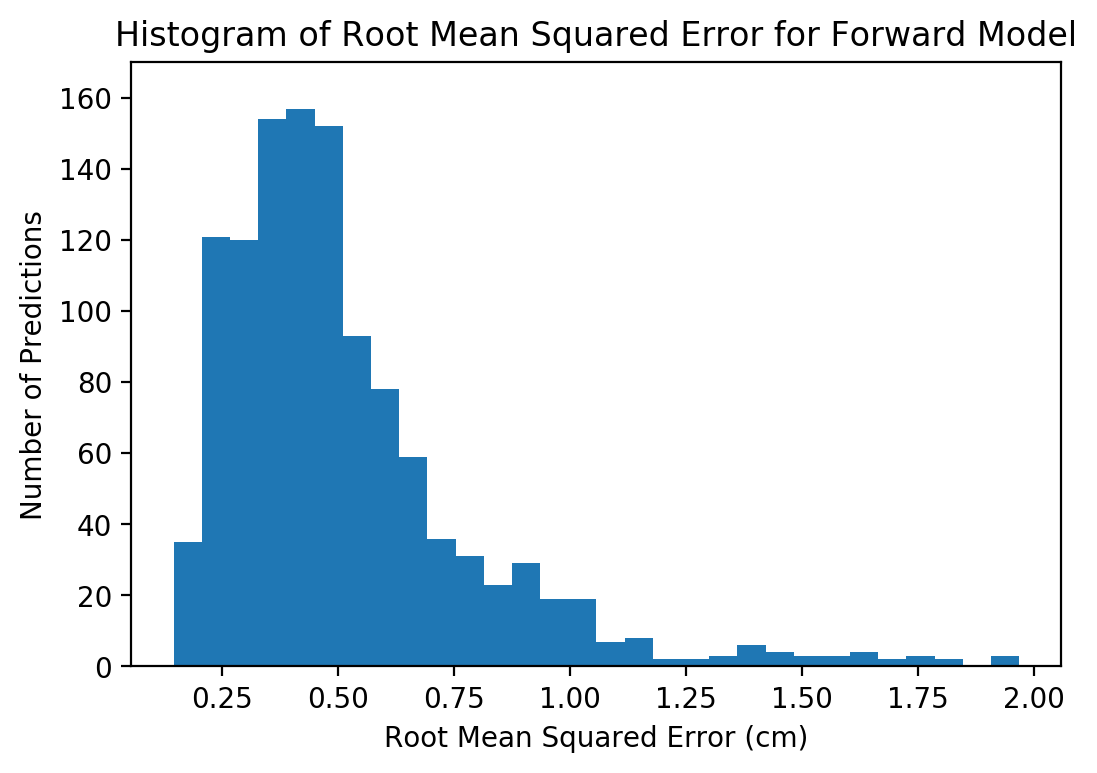

In [234]:
just_errors = []
for e in errors:
    just_errors.append(e[0])
plt.hist(just_errors, bins=30)
plt.title("Histogram of Root Mean Squared Error for Forward Model")
plt.ylim([0,170])
plt.ylabel("Number of Predictions")
plt.xlabel("Root Mean Squared Error (cm)")
plt.savefig("data/forward_error_histogram.png")

5431
data/good9_570_2.png


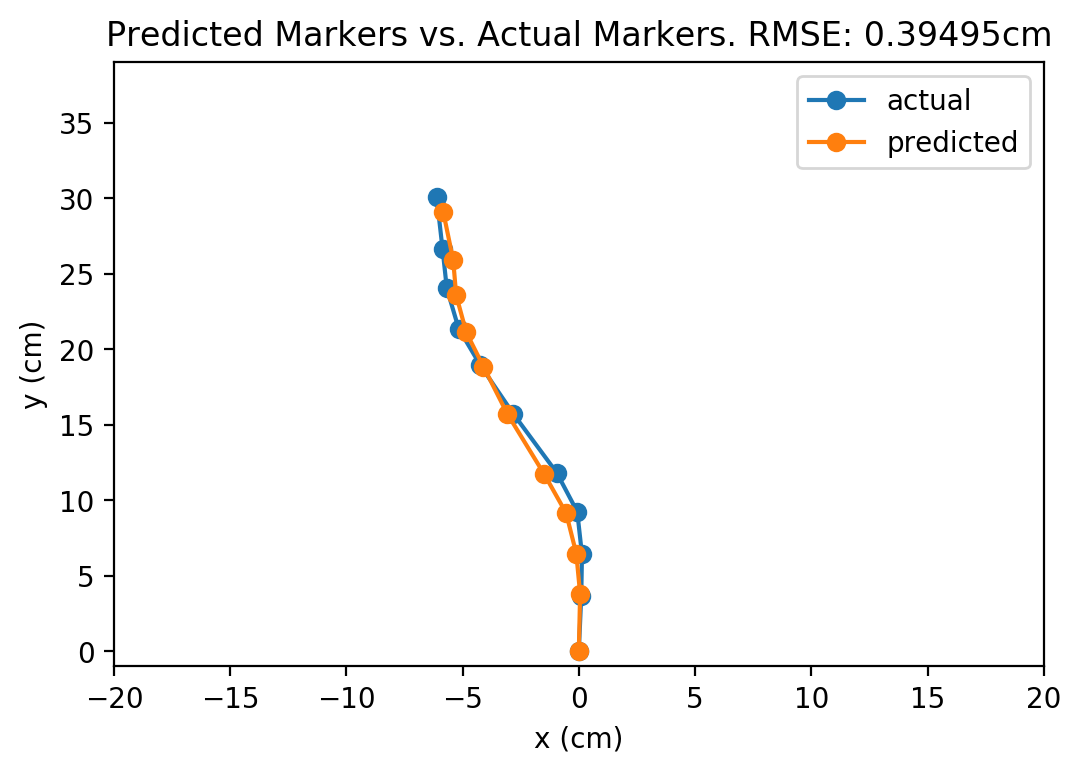

In [162]:
file_index = 9
data_index = 570
for idx, e in enumerate(errors):
    index = errors[idx][1]
    file_index_temp = all_df.loc[index, "file_index"]
    data_index_temp = all_df.loc[index, "data_index"]
    if file_index_temp == file_index and data_index_temp == data_index:
        break
#idx = 1157
index = errors[idx][1]
err = errors[idx][0]
print(index)
x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
y_pred = fmodel.predict(x_select)
cp = rescale(y_pred[0], y_labels)
ct = all_df.loc[index, y_labels].to_numpy()

xp = [0]
xt = [0]
yp = [0]
yt = [0]

for i in range(len(cp)):
    if i%2 == 0:
        xp.append(cp[i])
        xt.append(ct[i])
    else:
        yp.append(cp[i])
        yt.append(ct[i])

plt.plot(xt, yt, "-o", label="actual")
plt.plot(xp, yp, "-o", label="predicted")
plt.xlim([-20,20])
plt.ylim([-1,39])
plt.xlabel("x (cm)")
plt.ylabel("y (cm)")
plt.legend()
plt.title("Predicted Markers vs. Actual Markers. RMSE: " + str(round(err,5)) + "cm")
pd.set_option("display.max_rows", None, "display.max_columns", None)
file_index = all_df.loc[index, "file_index"]
data_index = all_df.loc[index, "data_index"]
fname = "data/good" + str(file_index) + "_" + str(data_index) + "_2.png"
print(fname)
plt.savefig(fname)

In [81]:
print(len(x_train))

4708


In [176]:
num_tests = len(x_test)
def evaluate_sort_pressures(idx=(0,num_tests-1,1)):
    index = errors[idx][1]
    err = errors[idx][0]
    x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
    y_pred = bmodel.predict(x_select)
    pp = rescale(y_pred[0], y_labels)
    pt = all_df.loc[index, y_labels].to_numpy()
    print(pp)
    print(pt)
    plt.plot([1,2], pt[0:2], "-o", label="actual M1", color="C0")
    plt.plot([3,4], pt[2:4], "-x", label="actual M2", color="C0")
    plt.plot([1,2], pp[0:2], "-o", label="predicted M1", color="C1")
    plt.plot([3,4], pp[2:4], "-x", label="predicted M2", color="C1")
    plt.ylim([95,120])
    plt.xlim([0.5,4.5])
    plt.xticks([1,2,3,4], ["P_1,1", "P_1,2", "P_2,1", "P_2,2"])
    plt.xlabel("Pressure Sensor")
    plt.ylabel("Pressure Value (kPa)")
    plt.legend()
    plt.title("Predicted Pressures vs. Actual Pressures. RMSE: " + str(round(err,3)) + "kPa")
    plt.show()
        
interact(evaluate_sort_pressures)

Widget Javascript not detected.  It may not be installed or enabled properly.


<function __main__.evaluate_sort_pressures(idx=(0, 1177, 1))>

In [13]:
# file_index = 9
# data_index = 570
# for idx, e in enumerate(errors):
#     index = errors[idx][1]
#     file_index_temp = all_df.loc[index, "file_index"]
#     data_index_temp = all_df.loc[index, "data_index"]
#     if file_index_temp == file_index and data_index_temp == data_index:
#         break
idx = 1177
print(idx)
index = errors[idx][1]
err = errors[idx][0]
print(index)
x_select = np.array(x_test.loc[index, :]).reshape(1, -1)
y_pred = bmodel.predict(x_select)
pp = rescale(y_pred[0], y_labels)
pt = all_df.loc[index, y_labels].to_numpy()
print(pp)
print(pt)
plt.plot([1,2], pt[0:2], "-o", label="actual M1", color="C0")
plt.plot([3,4], pt[2:4], "-x", label="actual M2", color="C0")
plt.plot([1,2], pp[0:2], "-o", label="predicted M1", color="C1")
plt.plot([3,4], pp[2:4], "-x", label="predicted M2", color="C1")
plt.ylim([95,120])
plt.xlim([0.5,4.5])
plt.xticks([1,2,3,4], ["P_1,1", "P_1,2", "P_2,1", "P_2,2"])
plt.xlabel("Pressure Sensor")
plt.ylabel("Pressure Value (kPa)")
plt.legend()
plt.title("Predicted Pressures vs. Actual Pressures. RMSE: " + str(round(err,3)) + "kPa")
pd.set_option("display.max_rows", None, "display.max_columns", None)
file_index = all_df.loc[index, "file_index"]
data_index = all_df.loc[index, "data_index"]
fname = "data_pressures/bad" + str(file_index) + "_" + str(data_index) + ".png"
print(fname)
plt.savefig(fname)

1177


NameError: name 'errors' is not defined

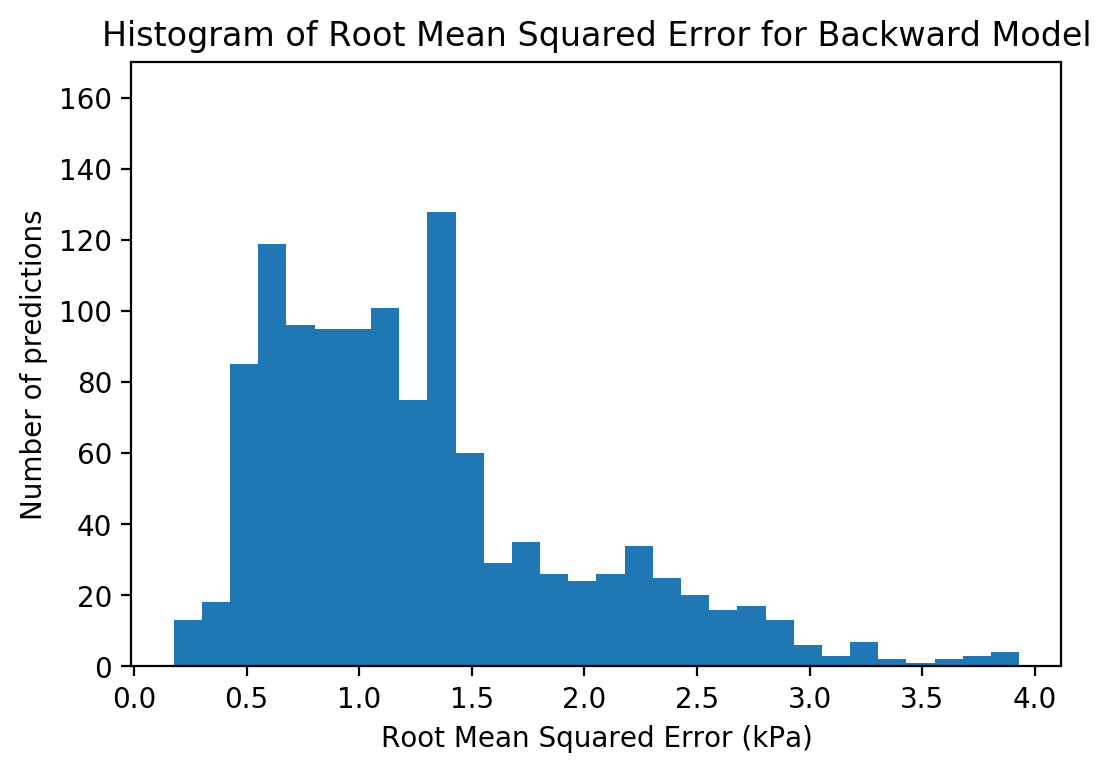

In [242]:
just_errors = []
for e in errors:
    just_errors.append(e[0])
plt.hist(just_errors, bins=30)
plt.title("Histogram of Root Mean Squared Error for Backward Model")
plt.ylim([0,170])
plt.ylabel("Number of predictions")
plt.xlabel("Root Mean Squared Error (kPa)")
plt.savefig("data/backward_error_histogram.png")